<a href="https://colab.research.google.com/github/Is9fauziah/prosaindata/blob/main/networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install networkx[default]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Graf berarah

In [8]:
import networkx as nx
G = nx.DiGraph()

In [9]:
G.add_edges_from([(1, 2), (1, 3),(1, 4),
                  (2, 1), (2, 4),
                  (3, 1), (3, 4), (3, 6), (3, 7),
                  (4, 2), (4, 3), (4, 5), (4, 6),
                  (5, 4), (5, 6), (5, 8), (5, 9),
                  (6, 4), (6, 5), (6, 7), (6, 8),
                  (7, 8), (7, 9),
                  (8, 6), (8, 7), (8, 9),
                  (9, 7), (9, 8)])

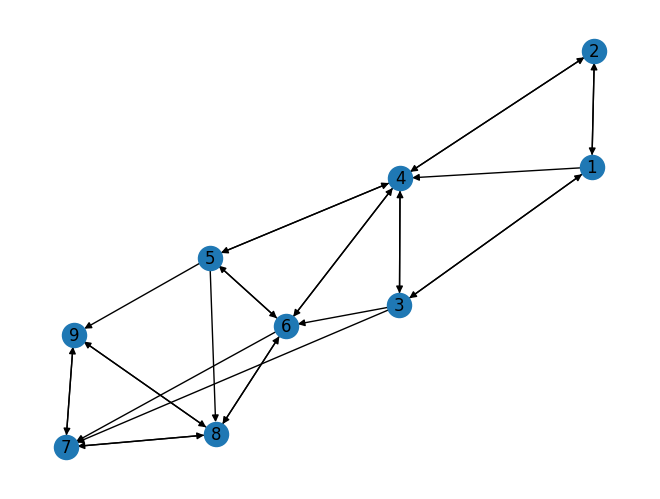

In [13]:
nx.draw(G,with_labels = True)

In [50]:
pr = nx.pagerank(G, alpha=0.85, max_iter=100, tol=1e-16)

print("PageRank:")
for node, value in pr.items():
    print(f"Node {node}: {value:.4f}")

PageRank:
Node 1: 0.0506
Node 2: 0.0532
Node 3: 0.0532
Node 4: 0.1046
Node 6: 0.1218
Node 7: 0.1821
Node 5: 0.0648
Node 8: 0.2041
Node 9: 0.1656


In [15]:
nx.degree_centrality(G)

{1: 0.625,
 2: 0.5,
 3: 0.75,
 4: 1.125,
 6: 1.0,
 7: 0.75,
 5: 0.75,
 8: 0.875,
 9: 0.625}

In [16]:
nx.closeness_centrality(G)

{1: 0.3333333333333333,
 2: 0.42105263157894735,
 3: 0.42105263157894735,
 4: 0.6153846153846154,
 6: 0.6666666666666666,
 7: 0.6153846153846154,
 5: 0.5,
 8: 0.5714285714285714,
 9: 0.5333333333333333}

In [18]:
nx.betweenness_centrality(G)

{1: 0.023809523809523808,
 2: 0.05357142857142857,
 3: 0.11904761904761903,
 4: 0.42261904761904756,
 6: 0.33333333333333326,
 7: 0.046130952380952384,
 5: 0.07291666666666666,
 8: 0.22619047619047616,
 9: 0.005952380952380952}

In [19]:
nx.eigenvector_centrality(G)

{1: 0.09196918375813279,
 2: 0.13968411254503085,
 3: 0.13968411254503085,
 4: 0.3323400597820283,
 6: 0.39782138655473526,
 7: 0.47110999727172714,
 5: 0.24037087602389548,
 8: 0.496046874917141,
 9: 0.39751893794220616}

### Importing libraries

In [23]:
!pip install PyPDF2
!pip install docx2txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 8.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3977 sha256=5e77b3bcfa16cba8ccccd5a44af403d5cbc1229718835d3e62ff78803b5c3e23
  Stored in directory: /root/.cache/pip/wheels/40/75/01/e6c444034338bde9c7947d3467807f889123465c2371e77418
Successfully built docx2txt


In [74]:
import numpy as np
import PyPDF2
import docx2txt
import sys
import matplotlib.pyplot as plt

In [29]:
import networkx as nx

In [30]:
from nltk.tokenize.punkt import PunktSentenceTokenizer

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

### Function to read the document from user

In [58]:
# we are going to show an example of how the method is working
# first let's take the document as an input
def readDoc():
    name = input('Please input a file name: ') 
    print('You have asked for the document {}'.format(name))

    # now read the type of document
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
        # print(name)
    print(choice)
    # Case 1: if it is a .txt file
        
    if choice == 1:
        f = open(name, 'r')
        document = f.read()
        f.close()
            
    # Case 2: if it is a .pdf file
    elif choice == 2:
        pdfFileObj = open(name, 'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    # Case 3: none of the format
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    print(type(document))
    return document

###Function to tokenize the document

In [59]:
# the function used for tokenizing the sentences
# tokenization of a sentence: '''provided in cell() above'''

def tokenize(document):
    # We are tokenizing using the PunktSentenceTokenizer
    # we call an instance of this class as sentence_tokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    
    # tokenize() method: takes our document as input and returns a list of all the sentences in the document
    
    # sentences is a list containing each sentence of the document as an element
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

### Read the document

In [60]:
# reading a file and 
# printing the size of the file
document = readDoc()
print('The length of the file is:', end=' ')
print(len(document))

Please input a file name: source1.txt
You have asked for the document source1.txt
1
<class 'str'>
The length of the file is: 1046


### Generate a list of sentences in the document

In [61]:
sentences_list = tokenize(document)

# let us print the size of memory used by the list sentences
print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))

# the size of one of the element of the list
print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))


The size of the list in Bytes is: 104
The size of the item 0 in Bytes is: 298


In [62]:
# let us see the data type of sentences_list
# It will be list
print(type(sentences_list))

<class 'list'>


In [63]:
# let us analyse the elements of the sentences
# len() method applies on the list and provides the number of elements in the list
print('The size of the list "sentences" is: {}'.format(len(sentences_list)))

The size of the list "sentences" is: 6


In [64]:
# print the elements of the list
# If the input document is long, which on realistically will be wrong, we would not like to print the entire document
for i in sentences_list:
    print(i)

Five women who have long accused Bill Cosby of sexually assaulting them early in their careers have filed the latest lawsuit against the 85-year-old comedian and this one calls NBCUniversal, a studio and a production company, complicit in the abuse.
The lawsuit comes more than a year after Cosby left prison after his 2018 sexual assault conviction in Pennsylvania was overturned.
This year, a Los Angeles jury awarded $500,000 to a woman who said Cosby had sexually abused her at the Playboy Mansion in 1975, when she was a teenager.
Bill Cosby leaves court surrounded by officers.
Woman testifies that in 1975 Bill Cosby grabbed her and kissed her aggressively
Read more
The lawsuit filed Monday under New York’s one-year window for adults to file sexual abuse complaints involves the accusers Lili Bernard, Eden Tirl, Jewel Gittens, Jennifer Thompson and Cindra Ladd.
The lawsuit alleges that each woman was abused or assaulted by the actor after meeting him on set or through other entertainment

###  Generate term-document matrix (TD matrix) of the data

In [65]:
# Convert a collection of text documents to a matrix of token counts
# fit_transform method of CountVectorizer() class 
# Learn the vocabulary dictionary and return term-document matrix. 
# I/p: An iterable which yields either str, unicode or file objects.
# O/p: The term-document matrix named cv_matrix
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [67]:
# a demo of what CountVectorizer().fit_transform(text) does
cv_demo = CountVectorizer() # a demo object of class CountVectorizer

# I have repeated the words to make a non-ambiguous array of the document text matrix 

text_demo = ["Ashish is good, you are bad", "I am not bad"] 
res_demo = cv_demo.fit_transform(text_demo)
print('Result demo array is {}'.format(res_demo.toarray()))

# Result is 2-d matrix containing document text matrix
# Notice that in the second row, there is 2.
# also, bad is repeated twice in that sentence.
# so we can infer that 2 is corresponding to the word 'bad'
print('Feature list: {}'.format(cv_demo.get_feature_names_out()))

Result demo array is [[0 1 1 1 1 1 0 1]
 [1 0 0 1 0 0 1 0]]
Feature list: ['am' 'are' 'ashish' 'bad' 'good' 'is' 'not' 'you']


In [69]:
# printing the cv_matrix type
# and how it is being stored in memory?
# it is stored in the compressed row format
# compressed row format: 
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names_out())
print(cv_matrix.toarray())

The data type of bow matrix <class 'scipy.sparse._csr.csr_matrix'>
Shape of the matrix <bound method spmatrix.get_shape of <6x116 sparse matrix of type '<class 'numpy.int64'>'
	with 156 stored elements in Compressed Sparse Row format>>
Size of the matrix is: 48
['000' '1960s' '1975' '1990s' '2018' '500' '85' 'abuse' 'abused' 'accused'
 'accusers' 'actor' 'adults' 'after' 'against' 'aggressively' 'alleges'
 'and' 'angeles' 'assault' 'assaulted' 'assaulting' 'at' 'awarded'
 'bernard' 'bill' 'by' 'calls' 'careers' 'cindra' 'circles' 'comedian'
 'comes' 'company' 'complaints' 'complicit' 'conviction' 'cosby' 'court'
 'each' 'early' 'eden' 'entertainment' 'file' 'filed' 'five' 'for'
 'gittens' 'grabbed' 'had' 'have' 'her' 'him' 'his' 'in' 'involves'
 'jennifer' 'jewel' 'jury' 'kissed' 'ladd' 'late' 'latest' 'lawsuit'
 'leaves' 'left' 'lili' 'long' 'los' 'mansion' 'meeting' 'monday' 'more'
 'nbcuniversal' 'new' 'of' 'officers' 'old' 'on' 'one' 'or' 'other'
 'overturned' 'pennsylvania' 'playb

In [70]:
# Tnormalized: document-term matrix normalized (value 0-1) according to the TF-IDF
# TF(Term Frequency): the no. of times a term(a word here) appears in the current document(single sentence here)
# IDF(Inverse Document Frequency): the no. of times a term(a word here) appears in the entire corpus
# Corpus: set of all sentences

normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0.         0.         0.         0.         0.         0.
  0.16533523 0.13557726 0.         0.16533523 0.         0.
  0.         0.         0.16533523 0.         0.         0.27115451
  0.         0.         0.         0.16533523 0.         0.
  0.         0.11446364 0.         0.16533523 0.16533523 0.
  0.         0.16533523 0.         0.16533523 0.         0.16533523
  0.         0.08470566 0.         0.         0.16533523 0.
  0.         0.         0.13557726 0.16533523 0.         0.
  0.         0.         0.33067047 0.         0.         0.
  0.16941132 0.         0.         0.         0.         0.
  0.         0.         0.16533523 0.09808664 0.         0.
  0.         0.16533523 0.         0.         0.         0.
  0.         0.16533523 0.         0.16533523 0.         0.16533523
  0.         0.13557726 0.         0.         0.         0.
  0.         0.         0.16533523 0.         0.         0.
  0.         0.13557726 0.         0.16533523 0.         0.
  0.         0. 

In [82]:
import scipy.sparse
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T
# plt.spy(res_graph)

<bound method _cs_matrix.toarray of <116x6 sparse matrix of type '<class 'numpy.float64'>'
	with 156 stored elements in Compressed Sparse Column format>>


In [84]:
# drawing a graph to proceed for the textrank algorithm
# nx_graph is a graph developed using the networkx library
# each node represents a sentence
# an edge represents that they have words in common
# the edge weight is the number of words that are common in both of the sentences(nodes)
# nx.draw() method is used to draw the graph created

nx_graph = nx.from_scipy_sparse_matrix(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

AttributeError: ignored

### Getting the rank of every sentence using textrank

In [85]:
# ranks is a dictionary with key=node(sentences) and value=textrank (the rank of each of the sentences)
ranks = nx.pagerank(nx_graph)

# analyse the data type of ranks
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

# print the dictionary
for i in ranks:
    print(i, ranks[i])

<class 'dict'>
The size used by the dictionary in Bytes is: 360
0 0.1744016310868828
1 0.16379281276742358
2 0.1664611002955351
3 0.14881740032157834
4 0.17700346593590105
5 0.169523589592679


###Finding important sentences and generating summary

In [86]:
# enumerate method: returns an enumerate object
# Use of list Comprehensions
# O/p: sentence_array is the sorted(descending order w.r.t. score value) 2-d array of ranks[sentence] and sentence 
# For example, if there are two sentences: S1 (with a score of S1 = s1) and S2 with score s2, with s2>s1
# then sentence_array is [[s2, S2], [s1, S1]]
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [87]:
# as sentence_array is in descending order wrt score value
# fmax is the largest score value(the score of first element)
# fmin is the smallest score value(the score of last element)

rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

In [89]:
# print the largest and smallest value of scores of the sentence
print(rank_max)
print(rank_min)

0.17700346593590105
0.14881740032157834


In [90]:
# Normalization of the scores
# so that it comes out in the range 0-1
# fmax becomes 1
# fmin becomes 0
# store the normalized values in the list temp_array

temp_array = []

# if all sentences have equal ranks, means they are all the same
# taking any sentence will give the summary, say the first sentence
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# If the sentence has different ranks
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))

6


In [91]:
# Calculation of threshold:
# We take the mean value of normalized scores
# any sentence with the normalized score 0.2 more than the mean value is considered to be 
threshold = (sum(temp_array) / len(temp_array)) + 0.2
# Separate out the sentences that satiasfy the criteria of having a score above the threshold
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])
model = sentence_list

###Writing the summary to a new file

In [92]:
# print(sentence_list)
summary = " ".join(str(x) for x in sentence_list)
print(summary)
# save the data in another file, names sum.txt
f = open('final3.txt', 'a+')
#print(type(f))
f.write('\n')
f.write(summary)
f.close

Woman testifies that in 1975 Bill Cosby grabbed her and kissed her aggressively
Read more
The lawsuit filed Monday under New York’s one-year window for adults to file sexual abuse complaints involves the accusers Lili Bernard, Eden Tirl, Jewel Gittens, Jennifer Thompson and Cindra Ladd. Five women who have long accused Bill Cosby of sexually assaulting them early in their careers have filed the latest lawsuit against the 85-year-old comedian and this one calls NBCUniversal, a studio and a production company, complicit in the abuse.


<function TextIOWrapper.close()>

In [93]:
for lines in sentence_list:
    print(lines)

Woman testifies that in 1975 Bill Cosby grabbed her and kissed her aggressively
Read more
The lawsuit filed Monday under New York’s one-year window for adults to file sexual abuse complaints involves the accusers Lili Bernard, Eden Tirl, Jewel Gittens, Jennifer Thompson and Cindra Ladd.
Five women who have long accused Bill Cosby of sexually assaulting them early in their careers have filed the latest lawsuit against the 85-year-old comedian and this one calls NBCUniversal, a studio and a production company, complicit in the abuse.
